# Raster Interpolation with scipy.interpolate.RegularGridInterpolator
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RegularGridInterpolator.html

The RegularGridInterpolator class can be used to perform linear interpolation in N dimensions. The grid is defined by the coordinates of the points in each dimension.

As in the one dimensional case, an interpolating function f is created from the original raster points and their respective data. The interpolating function can then be called with the new grid dimensions to return interpolated values.

## Create the original raster data 

We are creating a rectlinear grid with 6 points in the x dimension and 4 points in the y dimension. The data is a 2D array of ones with a single point in the center is set to 100.

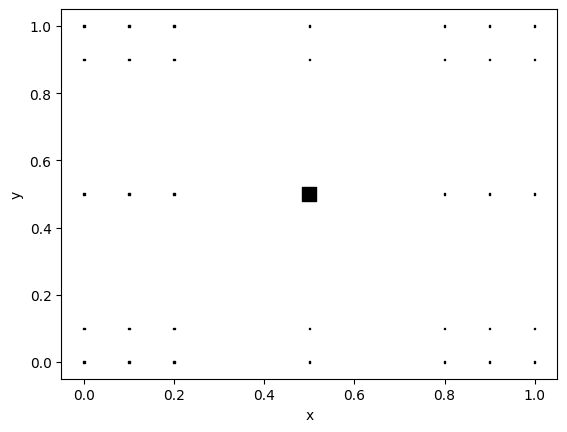

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

x = np.array([0, .1, .2, .5, .8, .9, 1])
y = np.array([0, .1,  0.5, .9, 1])
data = np.ones((len(x), len(y)))
data[3, 2] = 100

XX, YY = np.meshgrid(x, y, indexing='xy')

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(XX.ravel(), YY.ravel(), data.ravel(), c='k', marker='s')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

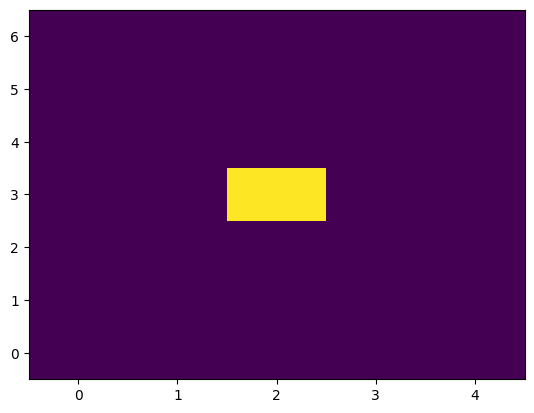

In [2]:
plt.imshow(data, origin='lower', aspect='auto')

## Create the interpolating function

In [3]:
interp = RegularGridInterpolator((x, y), data, bounds_error=False, fill_value=None)

## Interpolate the data to a new grid

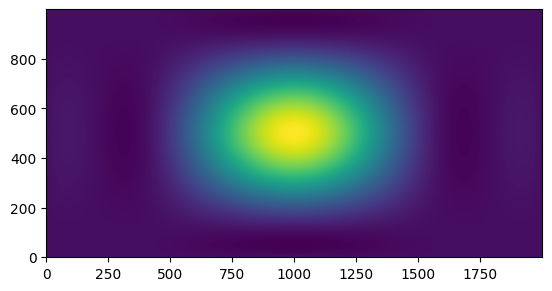

In [4]:
x_new = np.linspace(0, 1, 2000)
y_new = np.linspace(0, 1, 1000)
XX_new, YY_new = np.meshgrid(x_new, y_new, indexing='xy')

data_new = interp((XX_new, YY_new), method='cubic')
#plt.scatter(XX_new, YY_new, data_new, c='k', marker='s')
plt.imshow(data_new, origin='lower')

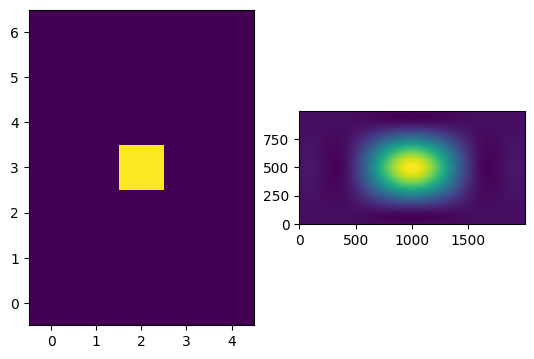

In [5]:
fig = plt.figure()
subplot_1 = fig.add_subplot(1, 2, 1)
subplot_2 = fig.add_subplot(1, 2, 2)

subplot_1.imshow(data, origin='lower')
subplot_2.imshow(data_new, origin='lower')